<a href="https://colab.research.google.com/github/Meghana-ssr/Mini-Project---Image-Classification/blob/main/Mini_Project_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("bike",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://1.bp.blogspot.com/-GC0-3nftgi8/ULSWodlSSFI/AAAAAAACCKU/gtYHfI7FFdw/s1600/Vintage+Photos+of+Girls+in+Mini+Skirts+on+Bikes+(6).jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://cdn.architecturendesign.net/wp-content/uploads/2016/03/AD-Examples-Of-Urban-Design-Which-Ought-To-Be-In-Every-City-08.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://chips-tv.com/wiki/images/thumb/2/2a/1267469185_75339_14.jpg/300px-1267469185_75339_14.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.setaswall.com/wp-content/uploads/2018/05/Planet-Ultra-HD-Wallpaper-720x1480-380x781.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.whipsix.com/images/thumbnails/0/300/IMG_4463.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.cicloclubvalmontone.it/wp-content/uploads/2016/02/castelluccio5-1200x610.jpg
[%] File Downloaded !

[%] Downlo

In [4]:
downloader.download("dogs",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://media1.santabanta.com/full1/Animals/Dogs/dog20v.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-oVa72zpi2NA/T2sSQMEZoCI/AAAAAAAANjc/CIMaZ9I68f4/s640/278871401895608811_Uk8aOP3Z_c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images6.fanpop.com/image/photos/32700000/camila-all-small-dogs-32784916-1936-2592.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://3.bp.blogspot.com/-_kVoxQ-KjlA/TqVox_7wnUI/AAAAAAAAAU0/7mHSjaK8Wts/s1600/funny-dogs-images.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.ytimg.com/vi/7TpgIIU7PQY/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.guardianpoolfence.com/wp-content/uploads/2011/11/temporary-fencing-for-dogs.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://rack.3.mshcdn.com/media/ZgkyMDEzLzAyLzIxL2M3LzI4NzQxMzA4NzYuYThhODMuanBnCnAJdGh1

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [6]:
target = []
images = []
flat_data = []

Dir = '/content/images'
categories = ['bike','dogs']

for i in categories:
  category_num = categories.index(i)
  path=os.path.join(Dir,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(category_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=109,test_size=0.3)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
        {'C':[1,10,100,1000],'kernel':['linear']},
        {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [10]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
accuracy_score(y_pred,y_test)

0.9477777777777778


In [13]:
c_m = confusion_matrix(y_pred,y_test)
c_m

array([[9, 2],
       [2, 5]])

In [14]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [15]:
model = pickle.load(open('img_model.p','rb'))

enter URLhttps://roadandmountainbikereviews.co.uk/wp-content/uploads/2018/11/Mafiabikes-kush-bmx-bike.jpg
predicted output is bike


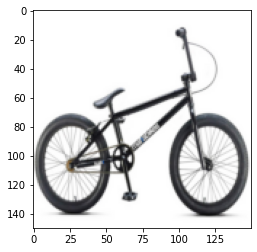

In [24]:
#testing a new image
flat_data = []
url = input('enter URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
plt.imshow(img_resized)
flat_data = np.array(flat_data)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'predicted output is {y_out}')

In [17]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok


     |████████████████████████████████| 8.2MB 11.2MB/s 
     |████████████████████████████████| 163kB 76.3MB/s 
     |████████████████████████████████| 4.2MB 76.8MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 112kB 67.2MB/s 
     |████████████████████████████████| 71kB 6.1MB/s 
     |████████████████████████████████| 122kB 68.3MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [21]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option("deprecation.showfileUploaderEncoding",False)
st.title("IMAGE CLASSIFIER")
st.text("Upload the Image")
clf = pickle.load(open('img_model.p','rb'))
uploadedImage = st.file_uploader("Select an Image",type="jpg")
if uploadedImage is not None:
  img=Image.open(uploadedImage)
  st.image(img,caption="Uploaded Image ")
  if st.button("Predict"):
    categories = ['bike','dogs']
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = clf.predict(flat_data)
    y_out = categories[y_out[0]]
    st.write(f'Predicted Output Is {y_out}')

Overwriting app.py


In [19]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://99bad50b77a9.ngrok.io'